In [45]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy import stats
import matplotlib.pyplot as plt

In [61]:
mydata = pd.read_csv("variables_with_benford.csv")
mydata.shape

(96397, 328)

In [62]:
mydata.head()

,Recnum,Amount,Cardnum_daysince,Cardnum_fre_0,Cardnum_mean_0,Cardnum_actual/_mean_0,Cardnum_max_0,Cardnum_actual/_max_0,Cardnum_median_0,Cardnum_actual/_median_0,...,num/amount1Merchnum14,amount/num1Merchnum14,amount/amount1Merchnum14,num/num1Merchnum30,num/amount1Merchnum30,amount/num1Merchnum30,amount/amount1Merchnum30,risk_week,Benford_Card,Benford_Merch
0,1,3.62,365.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.025994,1.000000,1.000000
1,2,31.42,365.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.025994,1.000894,1.000894
2,3,178.49,365.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.025994,1.000894,1.000894
3,4,3.62,365.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,...,3.867403,50.68,14.0,30.0,8.287293,108.6,30.0,0.025994,1.000000,1.000000
4,5,3.62,0.0,1.0,3.62,1.0,3.62,1.0,3.62,1.0,...,3.867403,50.68,14.0,30.0,8.287293,108.6,30.0,0.025994,1.000000,1.000000


In [63]:
# Standardize all columns
record_num = mydata["Recnum"]
mydata = mydata.drop(columns=["Recnum", "Amount"])
col = list(mydata.columns)
scaler = StandardScaler().fit_transform(mydata)
mydata = pd.DataFrame(scaler, columns=col)
mydata["Recnum"] = record_num
mydata.head()

,Cardnum_daysince,Cardnum_fre_0,Cardnum_mean_0,Cardnum_actual/_mean_0,Cardnum_max_0,Cardnum_actual/_max_0,Cardnum_median_0,Cardnum_actual/_median_0,Cardnum_total_0,Cardnum_actual/_total_0,...,amount/num1Merchnum14,amount/amount1Merchnum14,num/num1Merchnum30,num/amount1Merchnum30,amount/num1Merchnum30,amount/amount1Merchnum30,risk_week,Benford_Card,Benford_Merch,Recnum
0,7.346025,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.208071,-0.541872,-0.473163,-0.009680,-0.178840,-0.441987,3.190701,-0.262320,-0.111549,1
1,7.346025,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.208071,-0.541872,-0.473163,-0.009680,-0.178840,-0.441987,3.190701,-0.261611,-0.111349,2
2,7.346025,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.208071,-0.541872,-0.473163,-0.009680,-0.178840,-0.441987,3.190701,-0.261611,-0.111349,3
3,7.346025,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.196163,3.212381,4.237607,0.846631,-0.164571,4.067078,3.190701,-0.262320,-0.111549,4
4,-0.222747,-0.078915,-0.255398,-0.014161,-0.231503,-0.012626,-0.249162,-0.016534,-0.109231,-0.010056,...,-0.196163,3.212381,4.237607,0.846631,-0.164571,4.067078,3.190701,-0.262320,-0.111549,5


In [64]:
# add "Fraud" and "Date" columns to mydata
origin = pd.read_csv("transaction_cleaned.csv")
mydata = mydata.merge(origin[["Recnum", "Fraud", "Date"]], on="Recnum", how="left")
mydata.head()

,Cardnum_daysince,Cardnum_fre_0,Cardnum_mean_0,Cardnum_actual/_mean_0,Cardnum_max_0,Cardnum_actual/_max_0,Cardnum_median_0,Cardnum_actual/_median_0,Cardnum_total_0,Cardnum_actual/_total_0,...,num/num1Merchnum30,num/amount1Merchnum30,amount/num1Merchnum30,amount/amount1Merchnum30,risk_week,Benford_Card,Benford_Merch,Recnum,Fraud,Date
0,7.346025,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.473163,-0.009680,-0.178840,-0.441987,3.190701,-0.262320,-0.111549,1,0,2010-01-01
1,7.346025,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.473163,-0.009680,-0.178840,-0.441987,3.190701,-0.261611,-0.111349,2,0,2010-01-01
2,7.346025,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.473163,-0.009680,-0.178840,-0.441987,3.190701,-0.261611,-0.111349,3,0,2010-01-01
3,7.346025,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,4.237607,0.846631,-0.164571,4.067078,3.190701,-0.262320,-0.111549,4,0,2010-01-01
4,-0.222747,-0.078915,-0.255398,-0.014161,-0.231503,-0.012626,-0.249162,-0.016534,-0.109231,-0.010056,...,4.237607,0.846631,-0.164571,4.067078,3.190701,-0.262320,-0.111549,5,0,2010-01-01


## 1. Filter Method using KS and FDR at 3%

In [65]:
# filter data from the second week of January to the end of October
smalldf = mydata.loc[(mydata["Date"] > "2010-01-14")&(mydata["Date"] < "2010-11-01"), :]
# copy "fraud_label" column
smalldf["fraud_labelnew"] = smalldf["Fraud"]
# create a column with random numbers
random = uniform().rvs(len(smalldf))
smalldf["random"] = pd.Series(random)
# put all variables name in a list
variables = list(smalldf.columns)
variables.remove("Date")
variables.remove("Recnum")
smalldf.head()

/Users/wanwanjong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/wanwanjong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Cardnum_daysince,Cardnum_fre_0,Cardnum_mean_0,Cardnum_actual/_mean_0,Cardnum_max_0,Cardnum_actual/_max_0,Cardnum_median_0,Cardnum_actual/_median_0,Cardnum_total_0,Cardnum_actual/_total_0,...,amount/num1Merchnum30,amount/amount1Merchnum30,risk_week,Benford_Card,Benford_Merch,Recnum,Fraud,Date,fraud_labelnew,random
3338,-0.202011,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.178840,-0.441987,3.190701,0.952660,-0.092892,3345,0,2010-01-15,0,0.608573
3339,-0.202011,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.177664,-0.221970,3.190701,-0.262320,-0.111549,3346,0,2010-01-15,0,0.710977
3340,-0.202011,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.076684,0.053273,3.190701,-0.132233,-0.031624,3347,0,2010-01-15,0,0.610113
3341,-0.222747,-0.078915,-0.253887,-0.016309,-0.230522,-0.014776,-0.247611,-0.018671,-0.108992,-0.012215,...,-0.177611,-0.211944,3.190701,-0.262320,-0.111549,3348,0,2010-01-15,0,0.029050
3342,7.346025,-0.245524,-0.262690,-0.026677,-0.236240,-0.025154,-0.256650,-0.028984,-0.110387,-0.022632,...,-0.178840,-0.441987,3.190701,-0.261611,-0.106585,3349,0,2010-01-15,0,0.543325


In [66]:
# we need to run KS and FDR at 3% for each column in variables
top3percent = int(round(len(smalldf)*1.0*0.03))
# number of fraud record
badtotal = smalldf["Fraud"].sum()

# save the ks and fdr values in this dataframe
results = pd.DataFrame(columns=["Field Name", "KS", "FDR at 3%"])

for var in variables:
    if var != "fraud_labelnew":
        # extract the fraud records and normal records respectively
        fraud_df = smalldf.loc[smalldf["Fraud"] == 1, var] 
        good_df = smalldf.loc[smalldf["Fraud"] == 0, var] 
        # only need these two columns to calculate FDR at 3%
        tmp = smalldf[[var, "fraud_labelnew"]]

        # calculate KS
        ks = stats.ks_2samp(fraud_df, good_df)[0]

        # calculate FDR at 3%
        up_badrate = tmp.sort_values(var, ascending=True).iloc[:top3percent, 1].sum() / badtotal
        down_badrate = tmp.sort_values(var, ascending=False).iloc[:top3percent, 1].sum() / badtotal
        fdr = max(up_badrate, down_badrate)

        # save the ks and fdr values in a list, and append it to results dataframe
        row = {"Field Name": var, "KS": ks, "FDR at 3%": fdr}
        results = results.append(pd.Series(row), ignore_index=True)
results.head()

,Field Name,KS,FDR at 3%
0,Cardnum_daysince,0.291223,0.061060
1,Cardnum_fre_0,0.339447,0.171659
2,Cardnum_mean_0,0.462401,0.412442
3,Cardnum_actual/_mean_0,0.303057,0.029954
4,Cardnum_max_0,0.465901,0.430876


In [67]:
results.shape

(328, 3)

In [68]:
# create ranks based on KS and FDR
results["KS Rank"] = results["KS"].rank()
results["FDR Rank"] = results["FDR at 3%"].rank()
results["Average Rank"] = (results["KS Rank"] + results["FDR Rank"]) / 2.0
results = results.sort_values("Average Rank", ascending=False)
results.head()

,Field Name,KS,FDR at 3%,KS Rank,FDR Rank,Average Rank
326,Fraud,1.000000,1.000000,328.0,328.0,328.0
255,card_state_total_7,0.552733,0.505760,326.0,326.0,326.0
35,Cardnum_total_7,0.555182,0.494240,327.0,324.0,325.5
26,Cardnum_total_3,0.536278,0.528802,324.0,327.0,325.5
246,card_state_total_3,0.540805,0.486175,325.0,323.0,324.0


In [69]:
results.to_excel("P3_filter.xlsx", index=False)

## 2. Wrapper Method using RFECV

In [54]:
# remove fraud_label and random
results = results.loc[(results["Field Name"] != "Fraud")&(results["Field Name"] != "random"), :]
# select top 80 variables resulted from Filter Method to perform Wrapper Method
top80 = pd.Series(results.iloc[:80, 0]).values.tolist()
# select the data from mydata, filter only from Jan-Oct
wrap_df = mydata.loc[(mydata["Date"] > "2010-01-14")&(mydata["Date"] < "2010-11-01"), :]
wrap_X = wrap_df.loc[:, top80]
wrap_Y = wrap_df.loc[:, "Fraud"]
wrap_X.head()

,card_state_total_7,Cardnum_total_7,Cardnum_total_3,card_state_total_3,Cardnum_total_1,card_state_total_14,Cardnum_total_14,card_state_max_3,Cardnum_mean_1,card_state_total_1,...,card_merch_median_1,card_merch_mean_1,card_state_median_7,amount/amount1Cardnum30,amount/num0Cardnum14,Merchnum_mean_7,card_state_max_0,amount/num1Merchnum30,card_zip_max_30,amount/num0Cardnum7
3338,0.279518,0.185205,0.088284,-0.088275,0.093463,0.203174,0.514018,-0.210445,0.689485,-0.068764,...,-0.161395,-0.160031,1.280953,0.199553,-0.190053,0.119061,-0.136603,-0.178840,0.840698,-0.22281
3339,-0.043188,-0.145088,-0.049197,-0.043347,-0.010711,-0.055612,-0.240020,-0.194006,0.772741,-0.068764,...,-0.161395,-0.160031,-0.295010,2.101937,-0.190053,-0.441344,-0.136603,-0.177664,-0.270952,-0.22281
3340,0.043424,1.081293,1.214060,0.088058,0.356123,0.386557,1.222957,0.260039,0.392777,0.012881,...,0.281198,0.262425,0.240168,0.341270,-0.190053,-0.147783,-0.136603,-0.076684,0.347845,-0.22281
3341,-0.042095,-0.144451,-0.048447,-0.042218,-0.009900,-0.054585,-0.239541,-0.194006,0.203925,-0.067616,...,-0.148957,-0.148160,-0.295010,2.109642,-0.189863,-0.441364,-0.128919,-0.177611,-0.270952,-0.22255
3342,-0.127461,-0.289964,-0.191799,-0.088275,-0.132609,-0.179147,-0.369571,-0.210445,-0.372515,-0.068764,...,-0.161395,-0.160031,-0.302407,-0.510944,-0.190053,0.021717,-0.136603,-0.178840,-0.288633,-0.22281


In [55]:
# perform wrapper RFECV with logistic regression
model = LogisticRegression(max_iter=4000)
rfecv = RFECV(estimator=model, step=1, cv=2, verbose=3, n_jobs=-1, scoring='roc_auc')
rfecv.fit(wrap_X, wrap_Y)

Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 fe

RFECV(cv=2,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=4000,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring='roc_auc', step=1,
      verbose=3)

In [56]:
# put the variables and their ranking into a DataFrame
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), wrap_X.columns)),
                            columns = ['ranking', 'variable'])
var_selected.head(30)

,ranking,variable
0,1,Cardnum_max_30
1,1,Cardnum_mean_0
2,1,Cardnum_total_1
3,1,Cardnum_total_14
4,1,Cardnum_total_30
5,1,Merchnum_total_1
6,1,amount/amount1Cardnum30
7,1,card_merch_max_3
8,1,card_merch_max_7
9,1,card_merch_median_3


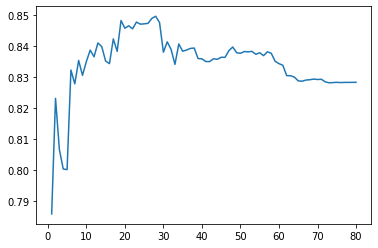

In [57]:
rfecvgrid = pd.Series(rfecv.grid_scores_)
plt.figure()
plt.plot(range(1,len(rfecvgrid)+1), rfecvgrid)
plt.xlim()
plt.show()

In [58]:
# save top 30 variables names into a list
top30var = pd.Series(var_selected.iloc[:30, 1]).values.tolist()
final30 = mydata.loc[:, top30var]
final30["Recnum"] = mydata["Recnum"]
final30["Date"] = mydata["Date"]
final30["Fraud"] = mydata["Fraud"]
final30.head()

,Cardnum_max_30,Cardnum_mean_0,Cardnum_total_1,Cardnum_total_14,Cardnum_total_30,Merchnum_total_1,amount/amount1Cardnum30,card_merch_max_3,card_merch_max_7,card_merch_median_3,...,card_zip_median_3,card_zip_total_1,card_zip_total_14,card_zip_total_30,card_zip_total_7,Cardnum_max_0,card_merch_mean_3,Recnum,Date,Fraud
0,-0.680420,-0.262690,-0.132609,-0.369571,-0.438583,-0.185258,-0.510944,-0.137732,-0.176881,-0.182334,...,-0.192510,-0.053167,-0.102434,-0.143212,-0.079100,-0.236240,-0.181973,1,2010-01-01,0
1,-0.680420,-0.262690,-0.132609,-0.369571,-0.438583,-0.185258,-0.510944,-0.137732,-0.176881,-0.182334,...,-0.192510,-0.053167,-0.102434,-0.143212,-0.079100,-0.236240,-0.181973,2,2010-01-01,0
2,-0.680420,-0.262690,-0.132609,-0.369571,-0.438583,-0.185258,-0.510944,-0.137732,-0.176881,-0.182334,...,-0.192510,-0.053167,-0.102434,-0.143212,-0.079100,-0.236240,-0.181973,3,2010-01-01,0
3,-0.680420,-0.262690,-0.132609,-0.369571,-0.438583,-0.184382,-0.510944,-0.137732,-0.176881,-0.182334,...,-0.192510,-0.053167,-0.102434,-0.143212,-0.079100,-0.236240,-0.181973,4,2010-01-01,0
4,-0.678667,-0.255398,-0.131937,-0.369174,-0.438330,-0.183506,4.194033,-0.132589,-0.172064,-0.172925,...,-0.182961,-0.052210,-0.101516,-0.142329,-0.078164,-0.231503,-0.172922,5,2010-01-01,0


In [59]:
final30.shape

(96397, 33)

In [60]:
final30.to_csv("final30var.csv", index=False)

In [70]:
top30var

['Cardnum_max_30',
 'Cardnum_mean_0',
 'Cardnum_total_1',
 'Cardnum_total_14',
 'Cardnum_total_30',
 'Merchnum_total_1',
 'amount/amount1Cardnum30',
 'card_merch_max_3',
 'card_merch_max_7',
 'card_merch_median_3',
 'card_merch_total_1',
 'card_merch_total_7',
 'card_state_max_1',
 'card_state_max_14',
 'card_state_max_30',
 'card_state_mean_1',
 'card_state_total_14',
 'card_state_total_3',
 'card_state_total_30',
 'card_zip_max_1',
 'card_zip_max_14',
 'card_zip_mean_1',
 'card_zip_mean_3',
 'card_zip_median_3',
 'card_zip_total_1',
 'card_zip_total_14',
 'card_zip_total_30',
 'card_zip_total_7',
 'Cardnum_max_0',
 'card_merch_mean_3']

In [73]:
top30_df = pd.DataFrame(columns=["Field Name"])
top30_df["Field Name"] = top30var
top30_df.to_excel("top30var.xlsx", index=False)
top30_df

,Field Name
0,Cardnum_max_30
1,Cardnum_mean_0
2,Cardnum_total_1
3,Cardnum_total_14
4,Cardnum_total_30
5,Merchnum_total_1
6,amount/amount1Cardnum30
7,card_merch_max_3
8,card_merch_max_7
9,card_merch_median_3
